In [1]:
import pandas as pd

In [3]:
df_0 = pd.read_csv("../data/processed/01_master_uniprots.csv")

In [5]:
df_1 = pd.read_csv("../data/processed/02_annotated_proteins.csv")

In [6]:
df_1

,uniprot_ac,gene_name,full_name,organism,protein_length,uniprot_reviewed,protein_evidence,pdb_count,alphafold_conf,chembl_count,panther_family_name,panther_sf_name,panther_annotation
0,P96262,thiS,NaN,Mycobacterium tuberculosis (strain ATCC 25618 ...,68.0,False,False,0,95.00,0,SULFUR CARRIER PROTEIN THIS,SULFUR CARRIER PROTEIN THIS,transfer/carrier protein
1,P9WG75,thiE,Thiamine-phosphate synthase,Mycobacterium tuberculosis (strain ATCC 25618 ...,222.0,True,True,1,95.50,0,THIAMINE-PHOSPHATE PYROPHOSPHORYLASE,THIAMINE-PHOSPHATE SYNTHASE,transferase
2,P9WGD5,ssb,Single-stranded DNA-binding protein,Mycobacterium tuberculosis (strain ATCC 25618 ...,164.0,True,True,6,84.69,0,SINGLE-STRANDED DNA-BINDING PROTEIN,SINGLE-STRANDED DNA-BINDING PROTEIN,DNA metabolism protein
3,P9WH45,rpsS,Small ribosomal subunit protein uS19,Mycobacterium tuberculosis (strain ATCC 25618 ...,93.0,True,True,10,88.25,0,RIBOSOMAL PROTEIN S19P FAMILY MEMBER,SMALL RIBOSOMAL SUBUNIT PROTEIN US19M,ribosomal protein
4,P9WH51,rpsQ,Small ribosomal subunit protein uS17,Mycobacterium tuberculosis (strain ATCC 25618 ...,135.0,True,True,10,80.81,0,40S RIBOSOMAL PROTEIN S11 FAMILY MEMBER,SMALL RIBOSOMAL SUBUNIT PROTEIN US17M,ribosomal protein
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3931,P9WH65,rpsK,Small ribosomal subunit protein uS11,Mycobacterium tuberculosis (strain ATCC 25618 ...,139.0,True,True,10,87.62,0,40S RIBOSOMAL PROTEIN S14/30S RIBOSOMAL PROTEI...,SMALL RIBOSOMAL SUBUNIT PROTEIN US11M,ribosomal protein
3932,P9WH93,rpmH,Large ribosomal subunit protein bL34,Mycobacterium tuberculosis (strain ATCC 25618 ...,47.0,True,True,11,94.69,0,MITOCHONDRIAL RIBOSOMAL PROTEIN 34 FAMILY MEMBER,LARGE RIBOSOMAL SUBUNIT PROTEIN BL34M,ribosomal protein
3933,P9WH99,rpmF,Large ribosomal subunit protein bL32,Mycobacterium tuberculosis (strain ATCC 25618 ...,57.0,True,True,12,93.38,0,NaN,NaN,NaN
3934,P9WHD7,rplO,Large ribosomal subunit protein uL15,Mycobacterium tuberculosis (strain ATCC 25618 ...,146.0,True,True,11,95.31,0,50S RIBOSOMAL PROTEIN L15,LARGE RIBOSOMAL SUBUNIT PROTEIN UL15M,ribosomal protein


In [8]:
df_0

,orf_id,patric_name,essentiality,strain,vi,vi_lower,vi_higher,high_confidence,uniprot_ac,in_chembl,is_known
0,Rv0416,thiamine biosynthesis protein ThiS,Essential,H37Rv,-7.926,-8.953,-6.891,False,P96262,0,0
1,Rv0414c,thiamine-phosphate pyrophosphorylase ThiE,Essential,H37Rv,-0.281,-0.480,-0.090,False,P9WG75,0,0
2,Rv0054,single-strand DNA-binding protein Ssb,Essential,H37Rv,-10.732,-14.644,-6.738,False,P9WGD5,0,0
3,Rv0705,30S ribosomal protein S19 RpsS,Essential,H37Rv,-17.252,-20.415,-13.994,False,P9WH45,0,0
4,Rv0710,30S ribosomal protein S17 RpsQ,Essential,H37Rv,-17.589,-18.498,-16.616,False,P9WH51,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3931,Rv3459c,30S ribosomal protein S11 RpsK,Uncertain,H37Rv,-11.728,-14.195,-9.328,True,P9WH65,0,0
3932,Rv3924c,50S ribosomal protein L34 RpmH,Uncertain,H37Rv,-11.992,-13.633,-10.352,True,P9WH93,0,0
3933,Rv0979A,50S ribosomal protein L32 RpmF,Uncertain,H37Rv,-6.578,-7.897,-5.288,True,P9WH99,0,0
3934,Rv0723,50S ribosomal protein L15 RplO,Uncertain,H37Rv,-15.142,-17.770,-12.528,True,P9WHD7,0,0


In [42]:
df = pd.merge(df_0, df_1, on="uniprot_ac", how="left")

is_vulnerable = []
for _, row in df.iterrows():
    if row["high_confidence"] == False:
        is_vulnerable += [0]
    else:
        if row["vi"] < -9.17575:
            is_vulnerable += [1]
        else:
            is_vulnerable += [0]

df["is_vulnerable"] = is_vulnerable


is_essential = []
for _, row in df.iterrows():
    if row["essentiality"] == "Essential" or row["essentiality"] == "Essential domain":
        is_essential += [1]
    else:
        is_essential += [0]

is_growth_defect = []
for _, row in df.iterrows():
    if row["essentiality"] == "Growth Defect":
        is_growth_defect += [1]
    else:
        is_growth_defect += [0]

df["is_essential"] = is_essential
df["is_growth_defect"] = is_growth_defect

In [43]:
df[df["essentiality"] == "Domain essential"].shape

(0, 26)

In [44]:
df["essentiality"].value_counts()

essentiality
NonEssential        2932
Essential            460
Growth Advantage     303
Growth Defect        135
Uncertain             77
Essential Domain      29
Name: count, dtype: int64

In [45]:
import collections
data = collections.defaultdict(list)
for v in df[["uniprot_ac", "is_known", "in_chembl", "is_essential", "is_growth_defect", "is_vulnerable"]].values:
    if v[1] == 1:
        data["Known"] += [v[0]]
    if v[2] == 1:
        data["In ChEMBL"] += [v[0]]
    if v[3] == 1:
        data["Essential"] += [v[0]]
    if v[4] == 1:
        data["Growth Defect"] += [v[0]]
    if v[5] == 1:
        data["Vulnerable"] += [v[0]]

In [46]:
from upsetplot import from_contents

upset_data = from_contents(data)

/Users/mduranfrigola/miniconda3/envs/eosframes/lib/python3.12/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)


/Users/mduranfrigola/miniconda3/envs/eosframes/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/Users/mduranfrigola/miniconda3/envs/eosframes/lib/python3.12/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate objec

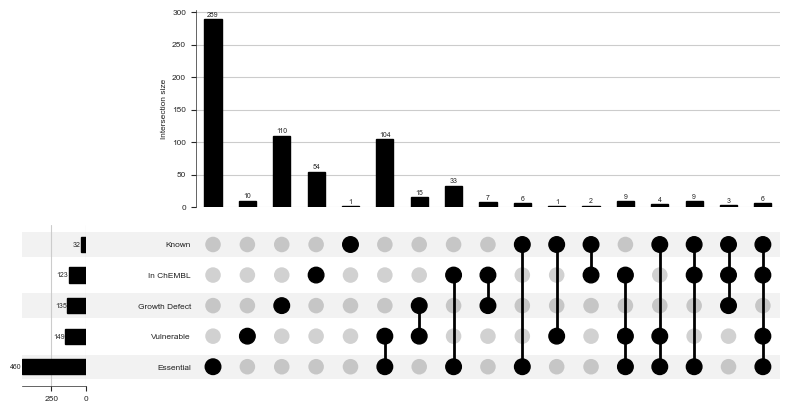

In [50]:
from upsetplot import UpSet

ax_dict = UpSet(upset_data, subset_size="count", show_counts=True).plot()

plt.savefig("../assets/02_upset_plot.png", dpi=300)

In [53]:
all_selected = []
for k, v in data.items():
    for item in v:
        all_selected += [item]

all_selected = set(all_selected)

In [55]:
df_ = df[df["uniprot_ac"].isin(all_selected)]

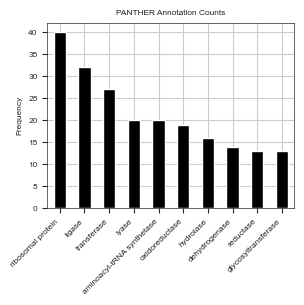

In [70]:
df_["panther_annotation"].value_counts()

df_["panther_annotation"].value_counts().head(10).plot(kind="bar", color="black", figsize=(3, 3))
plt.title("PANTHER Annotation Counts")
plt.xlabel("")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.savefig("../assets/02_panther_annotation_counts.png", dpi=300)

In [52]:
df["panther_annotation"].value_counts()

panther_annotation
dehydrogenase                              142
oxidoreductase                             114
hydrolase                                   85
transferase                                 78
methyltransferase                           75
                                          ... 
chaperonin                                   1
Hsp70 family chaperone                       1
primase                                      1
extracellular matrix structural protein      1
defense/immunity protein                     1
Name: count, Length: 111, dtype: int64

In [20]:
import numpy as np

np.percentile(df[df["high_confidence"] == True]["vi"], 25)

np.float64(-9.17575)

(array([   8.,   13.,   44.,   81.,  133.,  150.,  153.,  167.,  556.,
        2631.]),
 array([-17.953, -15.946, -13.939, -11.932,  -9.925,  -7.918,  -5.911,
         -3.904,  -1.897,   0.11 ,   2.117]),
 <BarContainer object of 10 artists>)

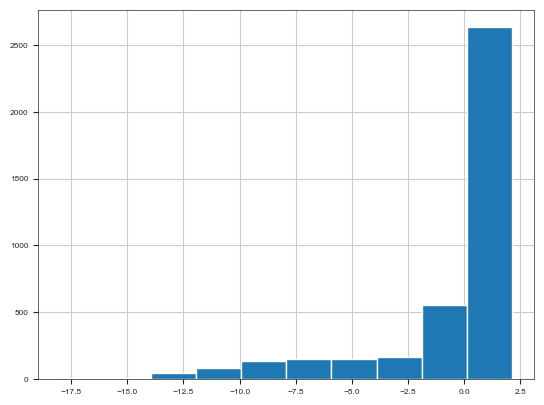

In [18]:
plt.hist(df["vi"])

In [17]:
for uniprot_ac in df[["uniprot_ac", "is_known", "in_chembl", "essentiality", ]]

Index(['orf_id', 'patric_name', 'essentiality', 'strain', 'vi', 'vi_lower',
       'vi_higher', 'high_confidence', 'uniprot_ac', 'in_chembl', 'is_known',
       'gene_name', 'full_name', 'organism', 'protein_length',
       'uniprot_reviewed', 'protein_evidence', 'pdb_count', 'alphafold_conf',
       'chembl_count', 'panther_family_name', 'panther_sf_name',
       'panther_annotation'],
      dtype='object')

In [15]:
df[df["is_known"] == 1].shape

df[df["in_chembl"] == 1].shape

(123, 23)

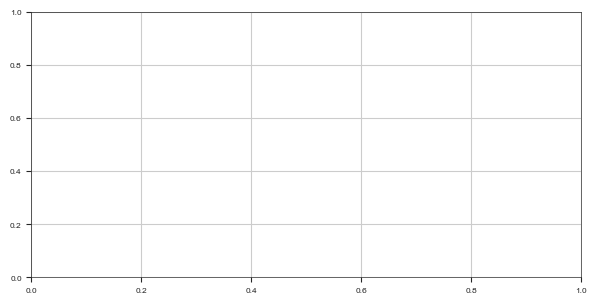

In [9]:
import matplotlib.pyplot as plt
import stylia

fig, axs = stylia.create_figure(1, 1, width=stylia.TWO_COLUMNS_WIDTH)

